In [15]:
import numpy as np
from numpy.fft import fft
import IPython
import random
import matplotlib.pyplot as plt
import scipy
plt.rcParams["text.usetex"] = True

In [16]:
def add_random_noise(audio_data: np.array, volume_ratio: float) -> np.array:
    """
    Adds random gaussian noise to audio of length `length` at a random index
    """
    if volume_ratio == 0:
        return audio_data
    data = audio_data.astype(np.float64)
    mean_noise_level = np.mean(np.abs(data))
    print(f'Mean noise level: {mean_noise_level}')
    noise = np.random.normal(0, volume_ratio * mean_noise_level, len(data))
    data += noise
    return data, noise

In [17]:
path = "test.wav"
sample_rate_hz, audio_data = scipy.io.wavfile.read(path)
audio_data = np.mean(audio_data, axis=1) # convert stereo to mono
audio_data = audio_data[:(10 * sample_rate_hz)]

print(sample_rate_hz)

44100


In [18]:
IPython.display.Audio(audio_data, rate=sample_rate_hz)

/opt/homebrew/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


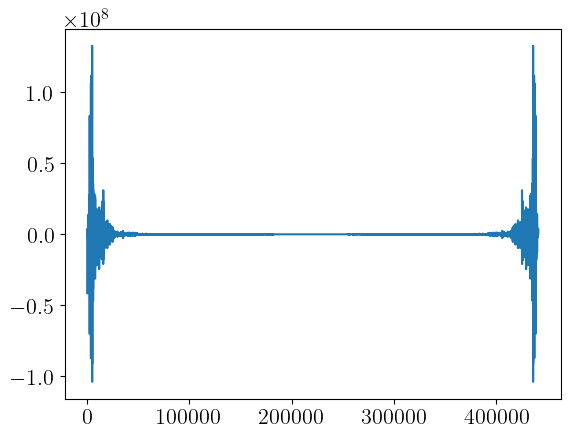

In [19]:
plt.plot(fft(audio_data))

In [20]:
import IPython
noisy, noise = add_random_noise(audio_data, volume_ratio=1)
IPython.display.Audio(noisy, rate=sample_rate_hz)

Mean noise level: 2656.825596371882


In [21]:
print(len(audio_data))
print(sample_rate_hz)

441000
44100


[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]


<Figure size 640x480 with 0 Axes>

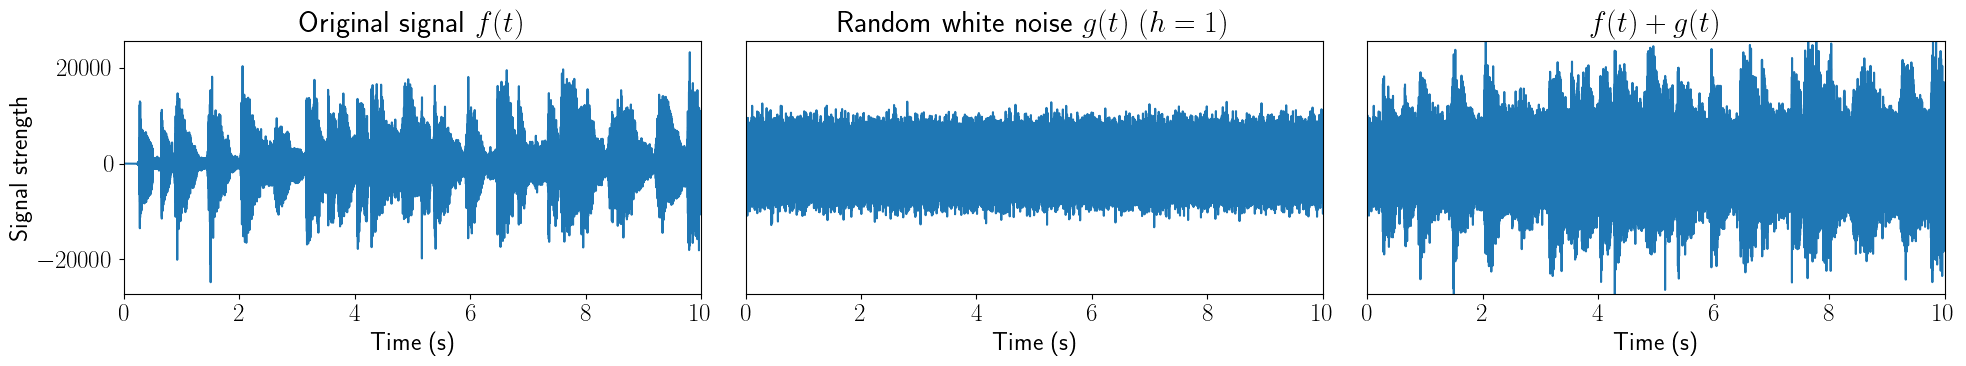

In [28]:
plt.clf()
plt.rcParams.update({'font.size': 18})
fig, axs = plt.subplots(1, 3)
fig.set_size_inches(20, 4)

labels = [x / sample_rate_hz for x in list(range(0, len(audio_data) + 1, sample_rate_hz))]

rescaled_audio_time_vals = np.linspace(0, len(audio_data) / sample_rate_hz, len(audio_data))

print(labels)

axs[0].plot(rescaled_audio_time_vals, audio_data)
axs[0].set_title("Original signal $f(t)$")
axs[0].set_xlim(0, 10)
axs[0].set_xlabel("Time (s)")
axs[0].set_ylabel("Signal strength")

axs[1].plot(rescaled_audio_time_vals, noise)
axs[1].set_title(r"Random white noise $g(t)$ $(h = 1)$")
axs[1].set_ylim(min(audio_data), max(audio_data))
axs[1].set_yticks([])
axs[1].set_xlim(0, 10)
axs[1].set_xlabel(r"Time (s)")

axs[2].plot(rescaled_audio_time_vals, noisy)
axs[2].set_title(r"$f(t) + g(t)$")
axs[2].set_ylim(min(audio_data), max(audio_data))
axs[2].set_yticks([])
axs[2].set_xlim(0, 10)
axs[2].set_xlabel(r"Time (s)")

plt.tight_layout()
plt.savefig("noise-before-after-time-domain.png")

/opt/homebrew/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/opt/homebrew/lib/python3.11/site-packages/matplotlib/transforms.py:2868: ComplexWarning: Casting complex values to real discards the imaginary part
  vmin, vmax = map(float, [vmin, vmax])


<Figure size 640x480 with 0 Axes>

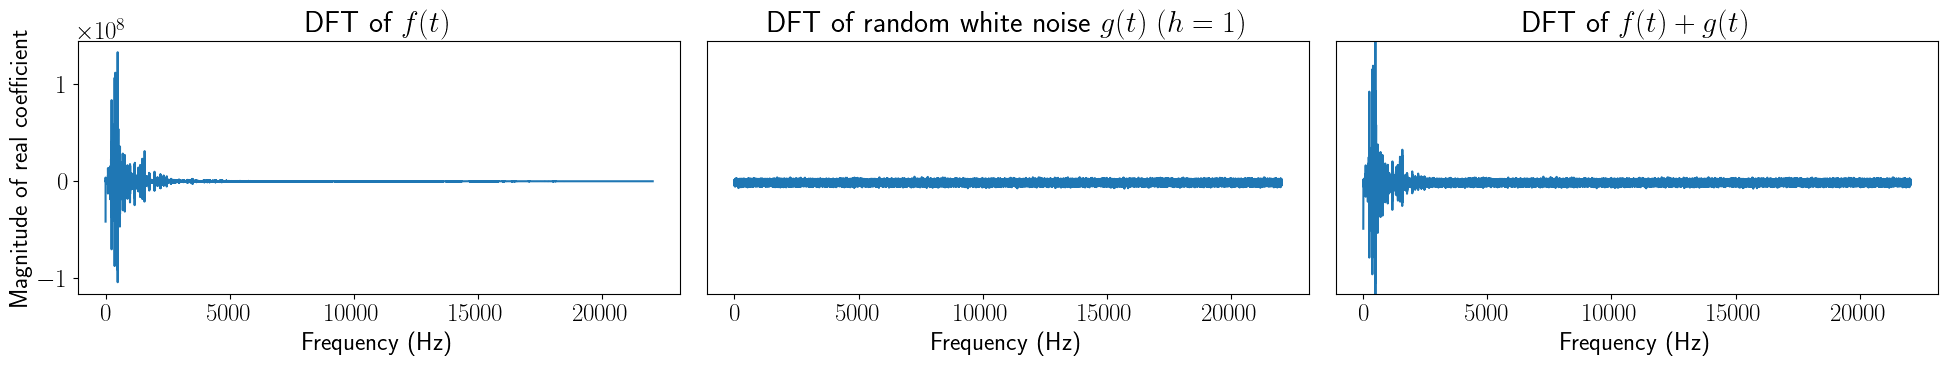

In [23]:
plt.clf()
fig, axs = plt.subplots(1, 3)
fig.set_size_inches(20, 4)

axs[0].plot(np.fft.rfftfreq(len(audio_data), d=1/sample_rate_hz), np.fft.rfft(audio_data))
axs[0].set_title("DFT of $f(t)$")
axs[0].set_xlabel("Frequency (Hz)")
axs[0].set_ylabel("Magnitude of real coefficient")

axs[1].plot(np.fft.rfftfreq(len(noise), d=1/sample_rate_hz), np.fft.rfft(noise))
axs[1].set_title("DFT of random white noise $g(t)$ $(h = 1)$")
axs[1].set_ylim(min(np.fft.rfft(audio_data)), max(np.fft.rfft(audio_data)))
axs[1].set_yticks([])
axs[1].set_xlabel("Frequency (Hz)")

axs[2].plot(np.fft.rfftfreq(len(noisy), d=1/sample_rate_hz), np.fft.rfft(noisy))
axs[2].set_title("DFT of $f(t) + g(t)$")
axs[2].set_ylim(min(np.fft.rfft(audio_data)), max(np.fft.rfft(audio_data)))
axs[2].set_yticks([])
axs[2].set_xlabel("Frequency (Hz)")

plt.tight_layout()
plt.savefig("noise-before-after-frequency-domain.png")

In [24]:
mean_noise_level = np.mean(np.abs(audio_data))
mean_noise_level
mean_noise_level = 20 * np.log10(mean_noise_level)

In [25]:
NOISE_LEVELS = [0.0, 0.5, 1.0, 2.5, 5.0, 7.5, 10.0]
distributions = []
for noise_level in NOISE_LEVELS:
    distributions.append(
        np.random.normal(0, noise_level * mean_noise_level, len(audio_data))
    )

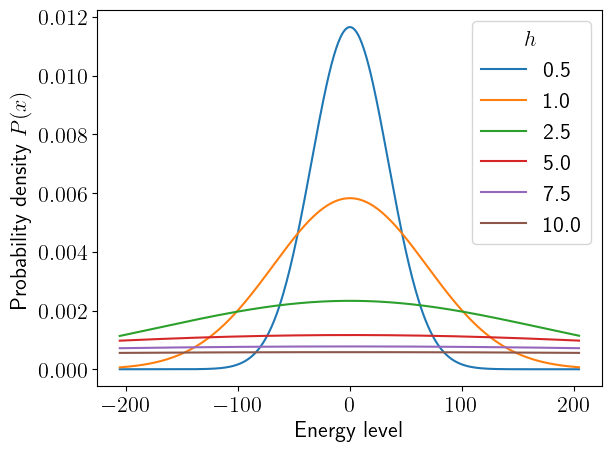

In [26]:

plt.rcParams.update({'font.size': 16})
from scipy.stats import norm
x_axis = np.arange(-3*mean_noise_level, 3*mean_noise_level, 1)

for noise_level in NOISE_LEVELS[1:]:
    plt.plot(x_axis, norm.pdf(x_axis,0,noise_level * mean_noise_level), label=f'{noise_level}')
plt.xlabel('Energy level')
plt.ylabel('Probability density $P(x)$')
plt.legend(title='$h$')
plt.tight_layout()
plt.savefig('noise_distributions.png')
